# Building a Python Web Scraping Project From Scratch

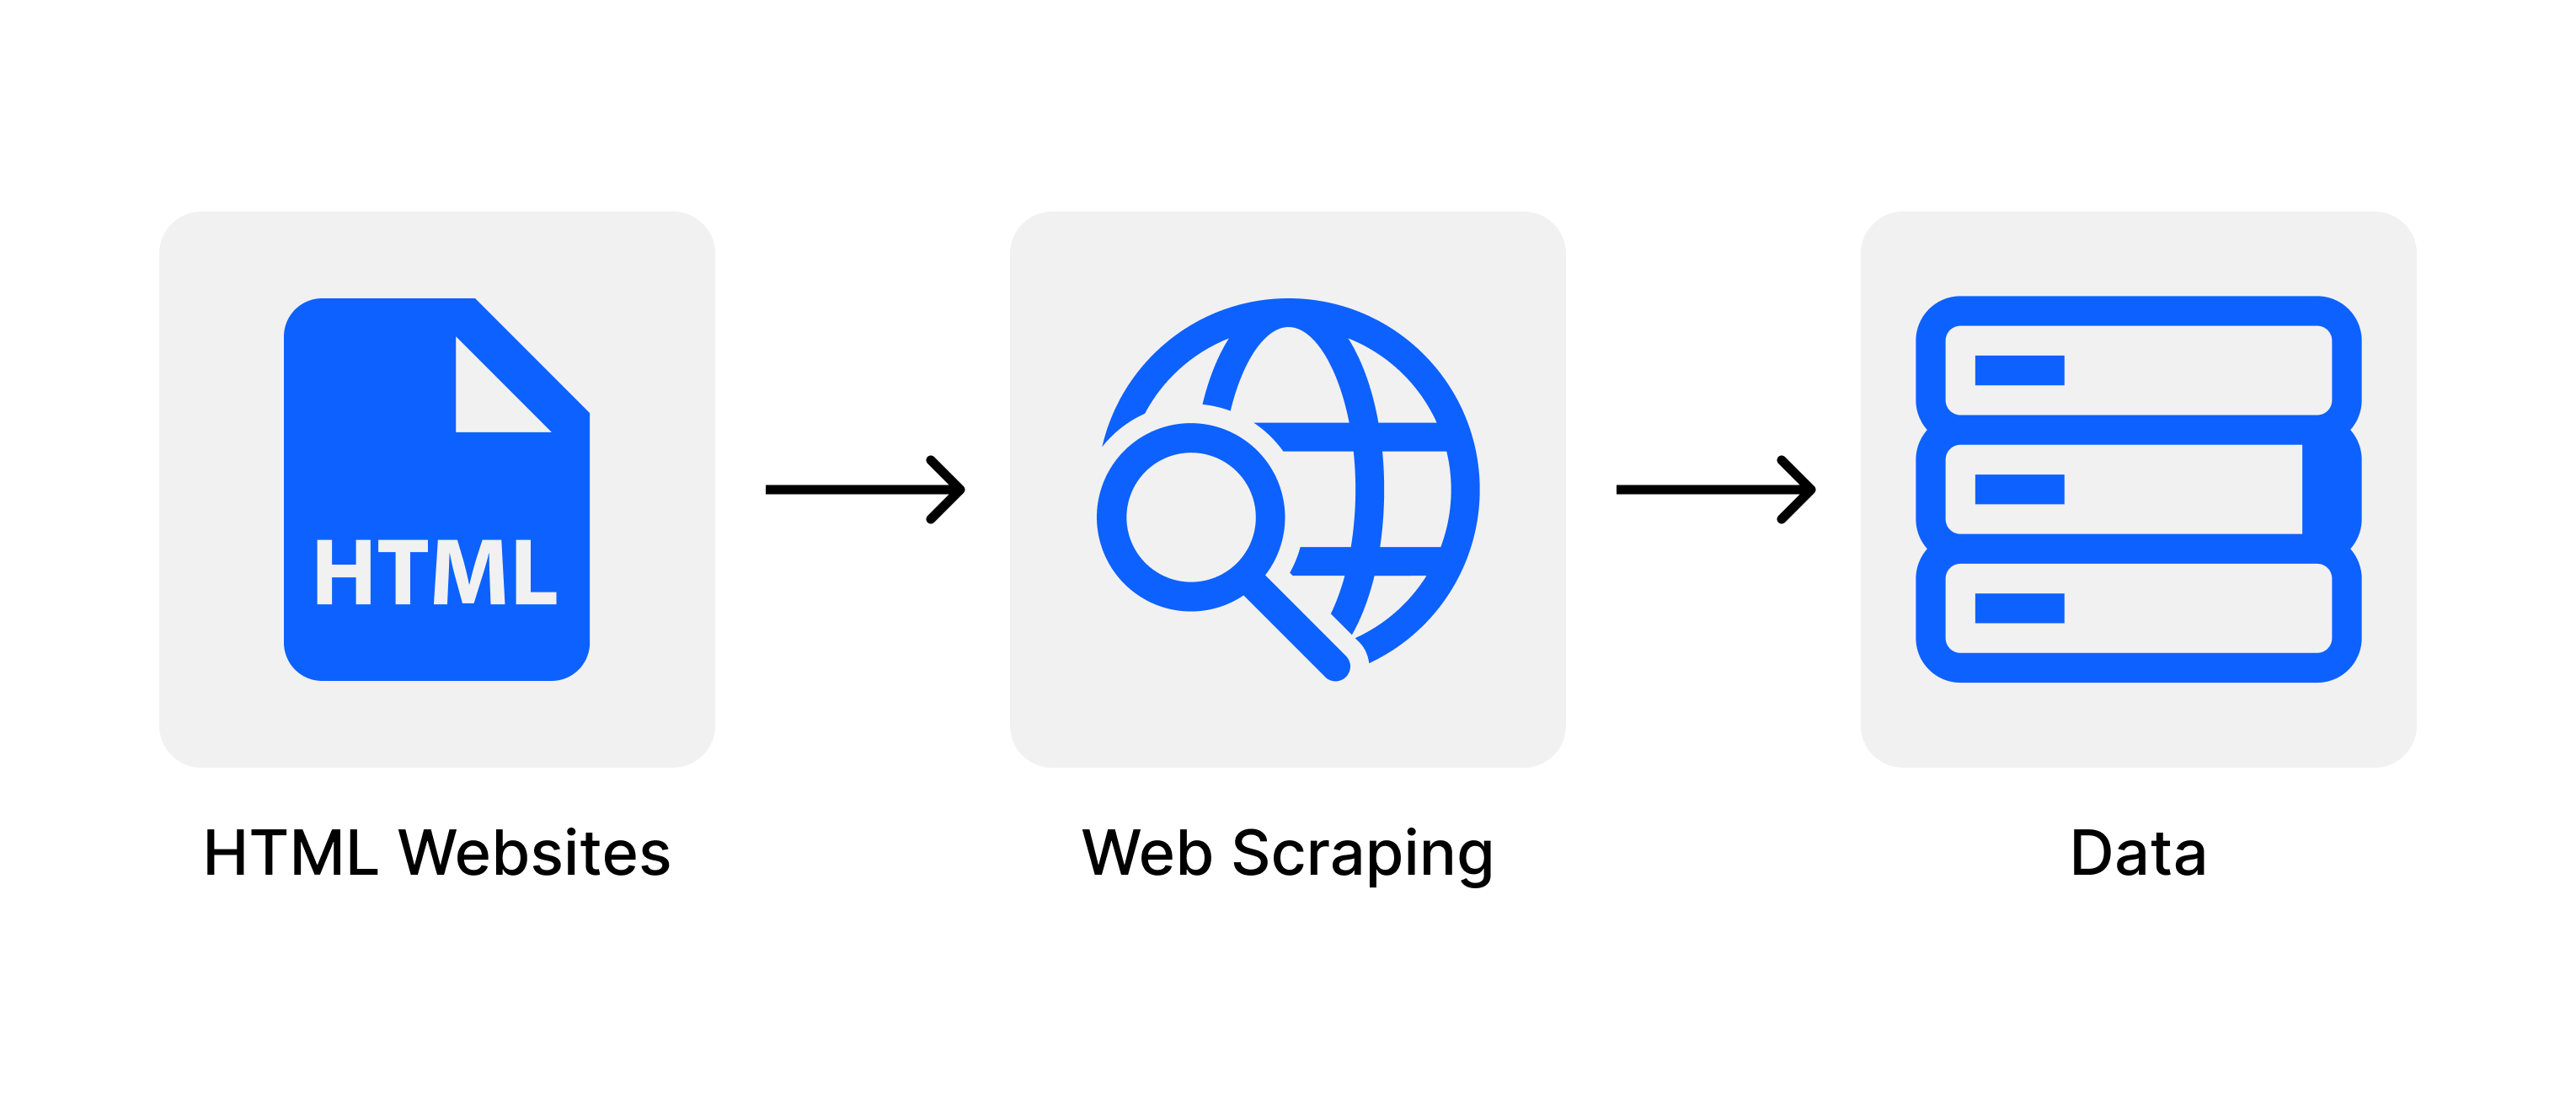

Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer program. It's a useful technique for creating datasets for research and learning. Follow these steps to build a web scraping project from scratch using Python and its ecosystem of libraries:



### 1. Pick a website and describe your objective

* Browse through different sites and pick on to scrape. Check the "Project Ideas" section for inspiration.
* Identify the information you'd like to scrape from the site. Decide the format of the output CSV file.
* Summarize your project idea and outline your strategy in a Juptyer notebook. Use the "New" button above.

#### Outline:
- We are going to scrap https://github.com/topics
- we'll get a list of topics. For each topic, we'll get topic s tittle, topics page URL and topic  descripstion
- For each topic, we'l get the top 25 repositories in the topic from topic page
- For each repository, we'll grab the repo name, username, starsand repo URL
- For each topic we'll create a CSV file in the following format:

In [1]:
import pandas as pd

### 2. Use the requests library to download web pages

* Inspect the website's HTML source and identify the right URLs to download.
* Download and save web pages locally using the requests library.
* Create a function to automate downloading for different topics/search queri

In [2]:
import requests

In [3]:
topics_url = "https://github.com/topics"

In [4]:
response = requests.get(topics_url)

In [5]:
response.status_code

200

In [6]:
len(response.text)

134305

In [7]:
#response.text

In [8]:
page_contents = response.text

In [9]:
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-iwdBeEEuDZbd2aAEzZti+bkBYQ2UKC6VEAhVMLKq5cCJnyeWVpgVqtgd3scKeZ63wYQTUQegRZwFGKlWOyr5Ew==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-8b074178412e0d96ddd9a004cd9b62f9.css" />\n  \n    <link crossorigin="anonymous" media="all" integrity="sha512-jO7efoKVVWr0bC2+ExApdfiR6CJG9iyiOv0Nq6i/mCmMXkIoVYN3BmTFzQ6J909ZW029YAtHxEu4eHRDyWGbJQ==" rel="stylesheet" href="https://github.githubassets.com/assets/behaviors-8ceede7e8295556af46c2dbe13102975.css" />\n    \n    \

In [10]:
with open('webpage.html', "w", encoding="utf-8") as f:
    f.write(page_contents)

### 3. Use Beautiful Soup to parse and extract information

* Parse and explore the structure of downloaded web pages using Beautiful soup.
* Use the right properties and methods to extract the required information.
* Create functions to extract from the page into lists and dictionaries.
* (Optional) Use a REST API to acquire additional information if required.

In [11]:
from bs4 import BeautifulSoup

In [12]:
doc = BeautifulSoup(page_contents, 'html.parser')

In [13]:
type(doc)

bs4.BeautifulSoup

In [14]:
p_tags = doc.find_all('p')

In [15]:
len(p_tags)

67

In [16]:
p_tags[:5]

[<p class="f4 color-text-secondary col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Redux
       </p>,
 <p class="f5 color-text-secondary text-center mb-0 mt-1">Redux is a predictable state container for JavaScript apps.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Chrome extension
       </p>,
 <p class="f5 color-text-secondary text-center mb-0 mt-1">Google Chrome Extensions are add-ons that allow users to customize their Chrome web browser.</p>]

**There are two ways to find the specific class*** 

In [17]:
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
topic_title_tags = doc.find_all('p', {'class': selection_class})

In [18]:
len(topic_title_tags)

30

In [19]:
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

In [20]:
title = pd.DataFrame(topic_title_tags)
title

,0
0,3D
1,Ajax
2,Algorithm
3,Amp
4,Android
5,Angular
6,Ansible
7,API
8,Arduino
9,ASP.NET


In [21]:
dsecription_class = 'f5 color-text-secondary mb-0 mt-1'
description_tags = doc.find_all('p', {'class': dsecription_class})

In [22]:
len(description_tags)

30

In [23]:
description_tags[:5]

[<p class="f5 color-text-secondary mb-0 mt-1">
               3D modeling is the process of virtually developing the surface and structure of a 3D object.
             </p>,
 <p class="f5 color-text-secondary mb-0 mt-1">
               Ajax is a technique for creating interactive web applications.
             </p>,
 <p class="f5 color-text-secondary mb-0 mt-1">
               Algorithms are self-contained sequences that carry out a variety of tasks.
             </p>,
 <p class="f5 color-text-secondary mb-0 mt-1">
               Amp is a non-blocking concurrency framework for PHP.
             </p>,
 <p class="f5 color-text-secondary mb-0 mt-1">
               Android is an operating system built by Google designed for mobile devices.
             </p>]

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
pd.DataFrame(description_tags)

,0
0,\n 3D modeling is the process of ...
1,\n Ajax is a technique for creati...
2,\n Algorithms are self-contained ...
3,\n Amp is a non-blocking concurre...
4,\n Android is an operating system...
5,\n Angular is an open source web ...
6,\n Ansible is a simple and powerf...
7,\n An API (Application Programmin...
8,\n Arduino is an open source hard...
9,\n ASP.NET is a web framework for...


In [26]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(pd.DataFrame(description_tags))

,0
0,\n 3D modeling is the process of ...
1,\n Ajax is a technique for creati...
2,\n Algorithms are self-contained ...
3,\n Amp is a non-blocking concurre...
4,\n Android is an operating system...
...,...
25,\n Ensure your code meets quality...
26,\n Compilers are software that tr...
27,\n Automatically build and test y...
28,\n The coronavirus disease 2019 (...


In [27]:
topic_title_tag0 = topic_title_tags[0]

In [28]:
topic_title_tag0.parent

<div class="flex-auto">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-text-secondary mb-0 mt-1">
              3D modeling is the process of virtually developing the surface and structure of a 3D object.
            </p>
</div>

In [29]:
div_tag = topic_title_tag0.parent.parent

In [30]:
div_tag.parent

<a class="d-flex no-underline" data-ga-click="Explore, go to 3d, location:All featured topics" href="/topics/3d">
<div class="color-bg-info f4 color-text-tertiary text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
<div class="d-sm-flex flex-auto">
<div class="flex-auto">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-text-secondary mb-0 mt-1">
              3D modeling is the process of virtually developing the surface and structure of a 3D object.
            </p>
</div>
<div class="d-inline-block js-toggler-container starring-container">
<a aria-label="You must be signed in to star a topic" class="btn btn-sm d-flex flex-items-center" data-ga-click="Explore, click star button when signed out,
        action:topics#index;
        text:Star" href="/login?return_to=%2Ftopics%2F3d" title="You must be signed in to star a topic">
<svg aria-hidden="true" class="octicon octicon-star

In [31]:
topic_link_tags = doc.find_all('a', {'class':'d-flex no-underline'})

In [32]:
len(topic_link_tags)

30

In [33]:
topic_link_tags[0]

<a class="d-flex no-underline" data-ga-click="Explore, go to 3d, location:All featured topics" href="/topics/3d">
<div class="color-bg-info f4 color-text-tertiary text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
<div class="d-sm-flex flex-auto">
<div class="flex-auto">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-text-secondary mb-0 mt-1">
              3D modeling is the process of virtually developing the surface and structure of a 3D object.
            </p>
</div>
<div class="d-inline-block js-toggler-container starring-container">
<a aria-label="You must be signed in to star a topic" class="btn btn-sm d-flex flex-items-center" data-ga-click="Explore, click star button when signed out,
        action:topics#index;
        text:Star" href="/login?return_to=%2Ftopics%2F3d" title="You must be signed in to star a topic">
<svg aria-hidden="true" class="octicon octicon-star

In [34]:
topic0_url = "https://github.com" + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [35]:
topic_title_tags[0].text

'3D'

In [36]:
topic_titles = []

for tag in topic_title_tags:
    topic_titles.append(tag.text)
    
print(topic_titles)    

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [37]:
topic_descs = []

for tag in description_tags:
    topic_descs.append(tag.text.strip())
    
topic_descs    

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency framework for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source hardware and software company and maker community.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'A

In [38]:
topic_urls = []
base_urls = 'https://github.com'

for tags in topic_link_tags:
    topic_urls.append(base_urls + tags['href'])
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

In [39]:
topic_dict = {
               'title': topic_titles,
               'description': topic_descs,
                'url' : topic_urls
}

In [40]:
topic_df = pd.DataFrame(topic_dict)

In [41]:
topic_df

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [42]:
data = pd.concat([title, topic_df], axis = 1 )

In [43]:
data

,0,title,description,url
0,3D,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


### 4. Create CSV file(s) with the extracted information

* Create functions for the end-to-end process of downloading, parsing, and saving CSVs.
* Execute the function with different inputs to create a dataset of CSV files.
* Verify the information in the CSV files by reading them back using Pandas.

In [44]:
data.to_csv('github_data.csv')

In [45]:
data = pd.read_csv('github_data.csv', index_col = 0)

In [46]:
data.head()

,0,title,description,url
0,3D,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android,Android is an operating system built by Google...,https://github.com/topics/android


### Getting Information Out

In [47]:
topic_page_url = topic_urls[0]

In [48]:
topic_page_url

'https://github.com/topics/3d'

In [49]:
response = requests.get(topic_page_url)

In [50]:
len(response.text)

611740

In [51]:
topic_doc = BeautifulSoup(response.text, 'html.parser')

In [52]:
h3_selection_class = 'f3 color-text-secondary text-normal lh-condensed'
repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})


In [53]:
len(repo_tags)

30

In [54]:
a_tags = repo_tags[0].find_all('a')

In [55]:
a_tags

[<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-view-component="true" href="/mrdoob">
             mrdoob
 </a>,
 <a class="text-bold" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904a4238816bc9b51ab7772f3e3644ce897d8dd4e5" data-view-component="true" href="/mrd

In [56]:
a_tags[0].text.strip()

'mrdoob'

In [57]:
a_tags[1].text.strip()

'three.js'

In [58]:
a_tags[1]['href']

'/mrdoob/three.js'

In [59]:
base_url = 'https://github.com'
repo_url = base_url + a_tags[1]['href']

print(repo_url)

https://github.com/mrdoob/three.js


In [60]:
star_tags = topic_doc.find_all('a', {'class' : 'social-count float-none'})

In [61]:
len(star_tags)

30

In [62]:
star_tags[0].text.strip()

'72.9k'

In [63]:
star_str = '72.9k'

In [64]:
star_str[-1]

'k'

In [65]:
int(float(star_str[:-1]) * 1000)

72900

In [66]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1]) * 1000)
    return int(stars_str)

In [67]:
parse_star_count(star_tags[0].text.strip())

72900

In [68]:
repo_tags[0]

<h3 class="f3 color-text-secondary text-normal lh-condensed">
<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="text-bold" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904

In [69]:
def get_repo_info(h3_tag, star_tag):
    #returns all the required info about a repository
    
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    
    return username, repo_name, stars, repo_url

In [70]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 72900, 'https://github.com/mrdoob/three.js')

In [71]:
len(repo_tags)

30

In [72]:
range(len(repo_tags))

range(0, 30)

In [73]:
topic_repos_dict = {
    'username':[],
    'repo_name': [],
    'stars' : [],
    'repo_url':[]
}

for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['stars'].append(repo_info[2]) 
    topic_repos_dict['repo_url'].append(repo_info[3]) 

In [74]:
topic_repos_dict

{'username': ['mrdoob',
  'libgdx',
  'BabylonJS',
  'pmndrs',
  'aframevr',
  'ssloy',
  'lettier',
  'FreeCAD',
  'metafizzy',
  'CesiumGS',
  'timzhang642',
  'a1studmuffin',
  'intel-isl',
  'spritejs',
  'tensorspace-team',
  'jagenjo',
  'AaronJackson',
  'YadiraF',
  'openscad',
  'domlysz',
  'ssloy',
  'mosra',
  'google',
  'gfxfundamentals',
  'cleardusk',
  'blender',
  'jasonlong',
  'antvis',
  'pissang',
  'cnr-isti-vclab'],
 'repo_name': ['three.js',
  'libgdx',
  'Babylon.js',
  'react-three-fiber',
  'aframe',
  'tinyrenderer',
  '3d-game-shaders-for-beginners',
  'FreeCAD',
  'zdog',
  'cesium',
  '3D-Machine-Learning',
  'SpaceshipGenerator',
  'Open3D',
  'spritejs',
  'tensorspace',
  'webglstudio.js',
  'vrn',
  'PRNet',
  'openscad',
  'BlenderGIS',
  'tinyraytracer',
  'magnum',
  'model-viewer',
  'webgl-fundamentals',
  '3DDFA',
  'blender',
  'isometric-contributions',
  'L7',
  'claygl',
  'meshlab'],
 'stars': [72900,
  18700,
  14400,
  14000,
  12900,
  

In [75]:
def get_topic_page(topic_url):
    #Download the page 
    response = requests.get(topic_url)
    #check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}', format(topic_url))
    # Parse using Beautiful Soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc
    
def get_repo_info(h3_tag, star_tag):
    #returns all the required info about a repository
    
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    
    return username, repo_name, stars, repo_url

def get_topic_repos(topic_doc):
    
    
    h3_selection_class = 'f3 color-text-secondary text-normal lh-condensed'
    #Get the h3 tags containing repo title, repo URL and username
    
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
    
    #get star tags
    star_tags = topic_doc.find_all('a', {'class' : 'social-count float-none'})
    
    topic_repos_dict = {
                        'username':[],
                        'repo_name': [],
                        'stars' : [],
                        'repo_url':[]
                          }
    
    #get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2]) 
        topic_repos_dict['repo_url'].append(repo_info[3]) 
    
    return pd.DataFrame(topic_repos_dict)
    
def scrape_topic(topic_url, topic_name):
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(topic_name + '.csv', index = None)        

In [76]:
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

In [77]:
url4 = topic_urls[4]

In [78]:
topic4_doc = get_topic_page(url4)

In [79]:
topic4_repo = get_topic_repos(topic4_doc)

In [80]:
topic4_repo

,username,repo_name,stars,repo_url
0,flutter,flutter,125000,https://github.com/flutter/flutter
1,justjavac,free-programming-books-zh_CN,81400,https://github.com/justjavac/free-programming-...
2,Genymobile,scrcpy,52000,https://github.com/Genymobile/scrcpy
3,Hack-with-Github,Awesome-Hacking,45100,https://github.com/Hack-with-Github/Awesome-Ha...
4,google,material-design-icons,43400,https://github.com/google/material-design-icons
5,wasabeef,awesome-android-ui,40900,https://github.com/wasabeef/awesome-android-ui
6,square,okhttp,40400,https://github.com/square/okhttp
7,android,architecture-samples,39100,https://github.com/android/architecture-samples
8,square,retrofit,38400,https://github.com/square/retrofit
9,Solido,awesome-flutter,36600,https://github.com/Solido/awesome-flutter


In [81]:
get_topic_repos(get_topic_page(topic_urls[10]))

,username,repo_name,stars,repo_url
0,atom,atom,55700,https://github.com/atom/atom
1,dracula,dracula-theme,16100,https://github.com/dracula/dracula-theme
2,mjswensen,themer,4300,https://github.com/mjswensen/themer
3,nteract,hydrogen,3700,https://github.com/nteract/hydrogen
4,shd101wyy,markdown-preview-enhanced,3300,https://github.com/shd101wyy/markdown-preview-...
5,miniflux,v2,3000,https://github.com/miniflux/v2
6,atom,teletype,2300,https://github.com/atom/teletype
7,mehcode,awesome-atom,1900,https://github.com/mehcode/awesome-atom
8,mmcdole,gofeed,1700,https://github.com/mmcdole/gofeed
9,joefitzgerald,go-plus,1500,https://github.com/joefitzgerald/go-plus


In [82]:
topic_repo_df = pd.DataFrame(topic_repos_dict)

In [83]:
topic_repo_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,72900,https://github.com/mrdoob/three.js
1,libgdx,libgdx,18700,https://github.com/libgdx/libgdx
2,BabylonJS,Babylon.js,14400,https://github.com/BabylonJS/Babylon.js
3,pmndrs,react-three-fiber,14000,https://github.com/pmndrs/react-three-fiber
4,aframevr,aframe,12900,https://github.com/aframevr/aframe
5,ssloy,tinyrenderer,11000,https://github.com/ssloy/tinyrenderer
6,lettier,3d-game-shaders-for-beginners,10700,https://github.com/lettier/3d-game-shaders-for...
7,FreeCAD,FreeCAD,9600,https://github.com/FreeCAD/FreeCAD
8,metafizzy,zdog,8600,https://github.com/metafizzy/zdog
9,CesiumGS,cesium,7300,https://github.com/CesiumGS/cesium


### Write a single Function to:
1. Get the list from the topics page 
2. Get the list of repos from the individual topic pages
3. For each topic, create a CSV of the top repos for the topic

In [84]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    
    topic_titles = []

    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

def get_topic_descs(doc):
    dsecription_class = 'f5 color-text-secondary mb-0 mt-1'
    description_tags = doc.find_all('p', {'class': dsecription_class})
    topic_descs = []
    for tag in description_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs  

def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class':'d-flex no-underline'})
    topic_urls = []
    base_urls = 'https://github.com'

    for tags in topic_link_tags:
        topic_urls.append(base_urls + tags['href'])
        
    return topic_urls
            
     
    

def scrape_topics():
    url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}', format(topic_url))
    topic_dict = {
                  'title' : get_topic_titles(doc),
                  'description': get_topic_descs(doc),
                  'url': get_topic_urls(doc),
                   }    
    return pd.DataFrame(topic_dict)



In [85]:
scrape_topics()

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [86]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    for index, row in topic_df.iterrows():
        print('Scraping top repositories for "{}" '.format(row['title']))
        scrape_topic(row['url'], row['title'])
        

In [87]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D" 
Scraping top repositories for "Ajax" 
Scraping top repositories for "Algorithm" 
Scraping top repositories for "Amp" 
Scraping top repositories for "Android" 
Scraping top repositories for "Angular" 
Scraping top repositories for "Ansible" 
Scraping top repositories for "API" 
Scraping top repositories for "Arduino" 
Scraping top repositories for "ASP.NET" 
Scraping top repositories for "Atom" 
Scraping top repositories for "Awesome Lists" 
Scraping top repositories for "Amazon Web Services" 
Scraping top repositories for "Azure" 
Scraping top repositories for "Babel" 
Scraping top repositories for "Bash" 
Scraping top repositories for "Bitcoin" 
Scraping top repositories for "Bootstrap" 


Exception: ('Failed to load page {}', 'https://github.com/topics/bootstrap')

In [88]:
for row in topic_df.iterrows():
    print(row[1])

title                                                         3D
description    3D modeling is the process of virtually develo...
url                                 https://github.com/topics/3d
Name: 0, dtype: object
title                                                       Ajax
description    Ajax is a technique for creating interactive w...
url                               https://github.com/topics/ajax
Name: 1, dtype: object
title                                                  Algorithm
description    Algorithms are self-contained sequences that c...
url                          https://github.com/topics/algorithm
Name: 2, dtype: object
title                                                        Amp
description    Amp is a non-blocking concurrency framework fo...
url                              https://github.com/topics/amphp
Name: 3, dtype: object
title                                                    Android
description    Android is an operating system built by Google..

In [89]:
for index, row in topic_df.iterrows():
    print(row['title'], row['url'])
    

3D https://github.com/topics/3d
Ajax https://github.com/topics/ajax
Algorithm https://github.com/topics/algorithm
Amp https://github.com/topics/amphp
Android https://github.com/topics/android
Angular https://github.com/topics/angular
Ansible https://github.com/topics/ansible
API https://github.com/topics/api
Arduino https://github.com/topics/arduino
ASP.NET https://github.com/topics/aspnet
Atom https://github.com/topics/atom
Awesome Lists https://github.com/topics/awesome
Amazon Web Services https://github.com/topics/aws
Azure https://github.com/topics/azure
Babel https://github.com/topics/babel
Bash https://github.com/topics/bash
Bitcoin https://github.com/topics/bitcoin
Bootstrap https://github.com/topics/bootstrap
Bot https://github.com/topics/bot
C https://github.com/topics/c
Chrome https://github.com/topics/chrome
Chrome extension https://github.com/topics/chrome-extension
Command line interface https://github.com/topics/cli
Clojure https://github.com/topics/clojure
Code quality h

In [90]:
topics_url

'https://github.com/topics'